<a href="https://colab.research.google.com/github/devxkrxshna/ml-projects/blob/main/rock_vs_mine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

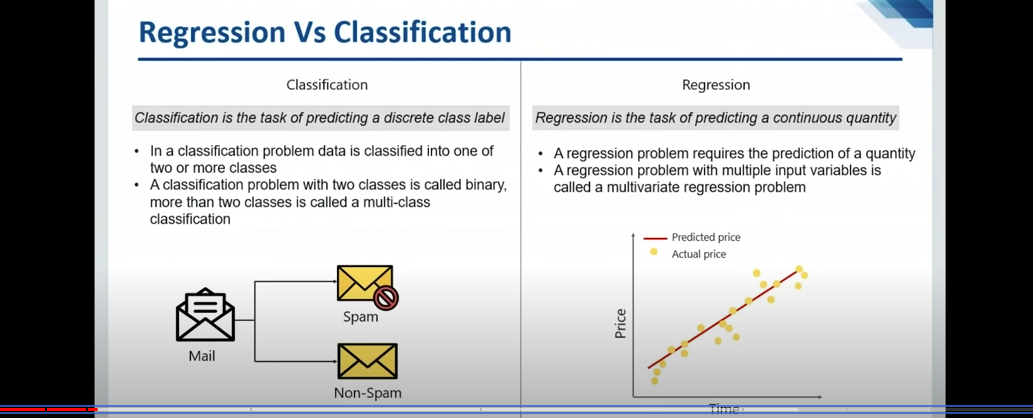

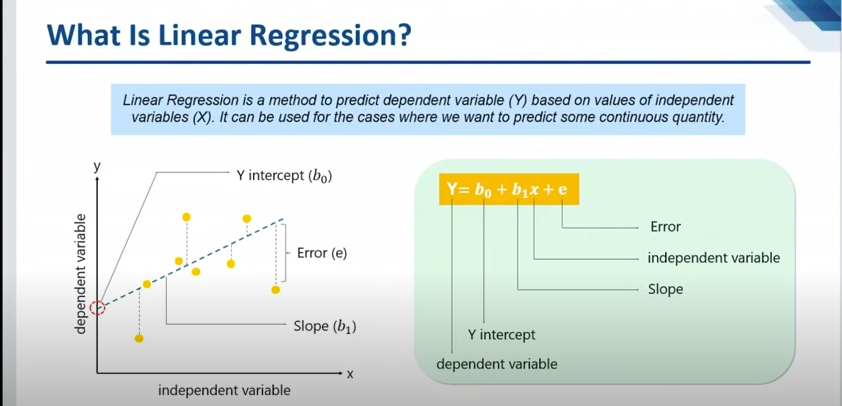

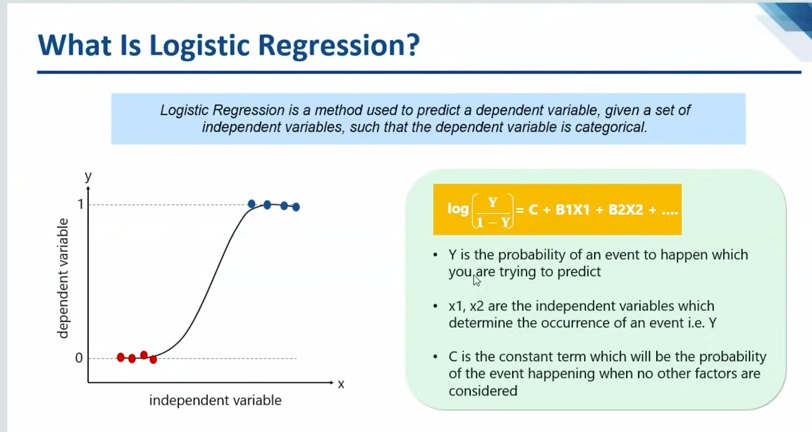

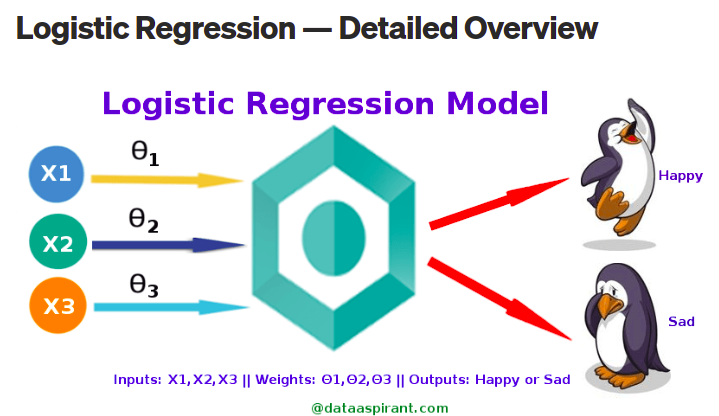



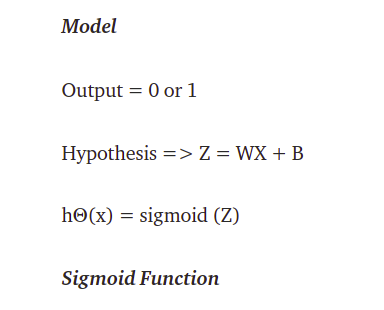

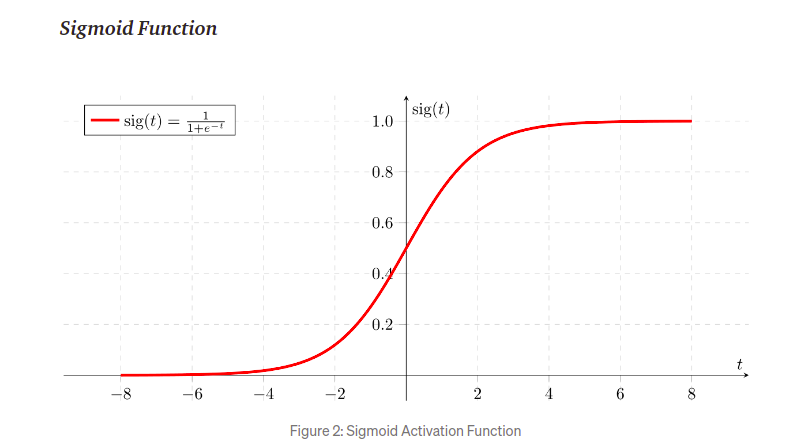

Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.

For example,

To predict whether an email is spam (1) or (0)

Whether the tumor is malignant (1) or not (0)

Consider a scenario where we need to classify whether an email is spam or not. If we use linear regression for this problem, there is a need for setting up a threshold based on which classification can be done. Say if the actual class is malignant, predicted continuous value 0.4 and the threshold value is 0.5, the data point will be classified as not malignant which can lead to serious consequence in real time.


From this example, it can be inferred that linear regression is not suitable for classification problem. Linear regression is unbounded, and this brings logistic regression into picture. Their value strictly ranges from 0 to 1.

Types of Logistic Regression

1. Binary Logistic Regression

The categorical response has only two 2 possible outcomes. Example: Spam or Not

2. Multinomial Logistic Regression

Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)

3. Ordinal Logistic Regression

Three or more categories with ordering. Example: Movie rating from 1 to 5

Decision Boundary

To predict which class a data belongs, a threshold can be set. Based upon this threshold, the obtained estimated probability is classified into classes.

Say, if predicted_value ≥ 0.5, then classify email as spam else as not spam.

Decision boundary can be linear or non-linear. Polynomial order can be increased to get complex decision boundary.

.......more mathematics........ 

.....refer later.........

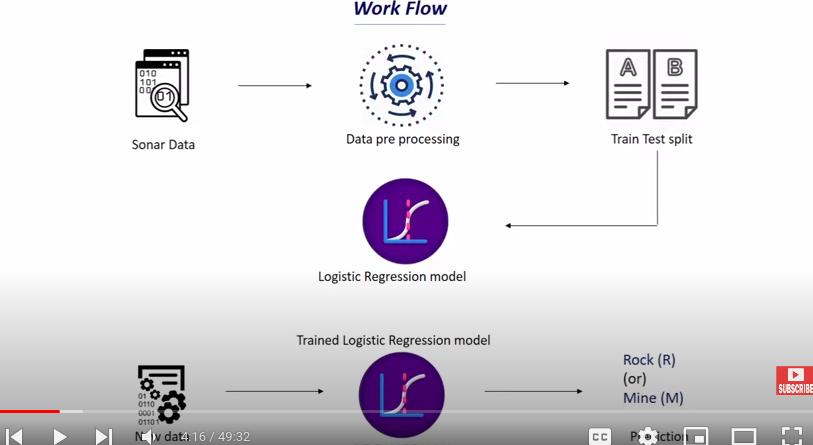

importing the Dependencies


In [ ]:
import numpy as np


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #used to find the accuracy of model

data collection and data processing

In [ ]:
#loading the dataset to a pandas data frame

In [ ]:
sonar_data=pd.read_csv('/content/Copy of sonar data.csv',header = None)

In [ ]:
sonar_data.head() #first five rows

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
sonar_data.shape

(208, 61)

In [ ]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
sonar_data[60].value_counts() #almost equal no of instances for both rock and mine

M    111
R     97
Name: 60, dtype: int64

In [ ]:
sonar_data.groupby(60).mean() #grouping rocks and mine based on mean of 60th coluns first M, then R

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


seperating data and labels

> Indented block



In [ ]:
x=sonar_data.drop(columns=60,axis=1) #if we are dropping rows then axis is 0
print(x)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [ ]:
y=sonar_data[60]
print(y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [ ]:
print(x)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

## stratify
This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

### random state

it is to reproduce the code as it is as given in the video

In [ ]:
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.1, stratify=y,random_state=1)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(208, 60) (187, 60) (21, 60)


model training ---> logistic regression


In [ ]:
model=LogisticRegression()

training the logistic regression  mode with training data

# what is model fitting

Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. A model that is well-fitted produces more accurate outcomes. A model that is overfitted matches the data too closely. A model that is underfitted doesn't match closely enough.

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

model evaluation

accuracy on training data

In [ ]:
x_train_prediction = model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train) #comparing the prediction of the model with the original label to get the accuracy

In [ ]:
print("accuracy of training data is",training_data_accuracy)

accuracy of training data is 0.8342245989304813


accuracy on test data (the model has never seen this data yet)

In [ ]:
x_test_prediction = model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [ ]:
print("accuracy of training data is",test_data_accuracy)

accuracy of training data is 0.7619047619047619


# predictive system

In [ ]:
input_data=(0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062)
#changing the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshaping the numpy array as we are predicting for one instance

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped) #returns R or M

In [ ]:
print(prediction)

['R']


In [ ]:
if prediction[0]=='R':
  print('oh its a Rock')
else:
  print('oh its a mine')  

oh its a Rock
